In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import glob
import os
import re
import pandas as pd
from astropy.stats import sigma_clip
import tarfile
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style="white", color_codes=True, context="notebook", font_scale=1.4)

mainpath = '/Users/jorgetil/Astro/HITS'

In [2]:
def give_me_lc(field, CCD, X, Y, extract=False):
    year = field[:-3]
    try:
        tar = tarfile.open("%s/lightcurves/%s/%s/%s/%s_%s_LC_50.tar.gz"
                           % (mainpath, year, field, CCD, field, CCD))
        fil = tar.extractfile('%s_%s_%s_%s_g.dat' % (field, CCD, X, Y))
        if extract:
            tar.extract('%s_%s_%s_%s_g.dat' % (field, CCD, X, Y),
                    path='/Users/jorgetil/Astro/HITS/lightcurves/samples/.')
    except:
        print 'No tar file or element in tar file'
        return None

    time, mag, err = [], [], []
    for line in fil:
        if line[0] == '#': continue
        values = line.split()
        time.append(float(values[1]))
        mag.append(float(values[2]))
        err.append(float(values[3]))
    time = np.asarray(time)
    mag= np.asarray(mag)
    err = np.asarray(err)

    try:
        fil = tar.extractfile('%s_%s_%s_%s_r.dat' % (field, CCD, X, Y))
        #tar.extract('%s_%s_%s_%s_r.dat' % (field, CCD, X, Y)
        #                , path='/Users/jorgetil/Downloads/.')
        time2, mag2, err2 = [], [], []
        for line in fil:
            if line[0] == '#': continue
            values = line.split()
            time2.append(float(values[1]))
            mag2.append(float(values[2]))
            err2.append(float(values[3]))
        time2 = np.asarray(time2)
        mag2 = np.asarray(mag2)
        err2 = np.asarray(err2)
        return time, mag, err, time2, mag2, err2
    except:
        print 'No lightcurve for other filter'
        return time, mag, err, None, None, None

In [4]:
table_file = '%s/BH/varQSO_cand_simbadQSO.csv' % (mainpath)
table = pd.read_csv(table_file)
table.set_index('col1', inplace=True)

In [5]:
table

,Var_prob,Pred_Var_Type_05,Per_prob,Pred_VarPer_Type,DSCT,EB,ROTVAR,RRLYR,Pred_VarPerSub_Type,CV,...,R_x,J,H,K,u,g,r_xa,i,z,angDist
col1,,,,,,,,,,,,,,,,,,,,,
Blind15A_05_N6_0303_0856,0.566527,Var,0.002470,NonPer,NaN,NaN,NaN,NaN,NaN,0.097677,...,NaN,NaN,NaN,NaN,22.261,20.057,18.700,18.170,17.850,1.359161
Blind15A_05_S29_1458_0782,0.699068,Var,0.213011,NonPer,NaN,NaN,NaN,NaN,NaN,0.050000,...,NaN,NaN,NaN,NaN,20.420,19.300,18.365,17.892,17.580,1.009182
Blind15A_14_S8_0446_1355,0.833333,Var,0.381644,NonPer,NaN,NaN,NaN,NaN,NaN,0.075000,...,NaN,19.466,19.294,19.397,19.475,19.350,19.405,19.271,19.276,0.711184
Blind15A_19_N19_1345_1791,0.700000,Var,0.370249,NonPer,NaN,NaN,NaN,NaN,NaN,0.025000,...,18.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.226589
Blind15A_23_N26_1886_1994,0.666667,Var,0.456887,NonPer,NaN,NaN,NaN,NaN,NaN,0.025000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769606
Blind15A_27_N19_0351_0572,0.930742,Var,0.406718,NonPer,NaN,NaN,NaN,NaN,NaN,0.075000,...,NaN,20.223,19.806,19.561,21.214,20.736,20.629,20.388,20.348,1.175792
Blind15A_28_N4_0536_1569,0.524936,Var,0.069174,NonPer,NaN,NaN,NaN,NaN,NaN,0.025000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.973412
Blind15A_29_S4_1269_1897,0.866667,Var,0.178371,NonPer,NaN,NaN,NaN,NaN,NaN,0.025000,...,17.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398204
Blind15A_33_N6_1521_2397,0.700000,Var,0.409683,NonPer,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,17.592,17.324,16.882,19.877,19.505,18.680,18.000,18.117,0.144119


In [9]:
print table.columns.values

['Var_prob' 'Pred_Var_Type_05' 'Per_prob' 'Pred_VarPer_Type' 'DSCT' 'EB'
 'ROTVAR' 'RRLYR' 'Pred_VarPerSub_Type' 'CV' 'QSO' 'SNe'
 'Pred_VarNonPerSub_Type' 'Pred_class' 'internalID' 'ID' 'raMedian'
 'decMedian' 'X' 'Y' 'spCl' 'spSubCl' 'Var_Type' 'Var_subType' 'Amplitude'
 'AndersonDarling' 'Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma'
 'CAR_tau' 'Con' 'Eta_e' 'FluxPercentileRatioMid20'
 'FluxPercentileRatioMid35' 'FluxPercentileRatioMid50'
 'FluxPercentileRatioMid65' 'FluxPercentileRatioMid80'
 'Freq1_harmonics_amplitude_0' 'Freq1_harmonics_amplitude_1'
 'Freq1_harmonics_amplitude_2' 'Freq1_harmonics_amplitude_3'
 'Freq1_harmonics_rel_phase_0' 'Freq1_harmonics_rel_phase_1'
 'Freq1_harmonics_rel_phase_2' 'Freq1_harmonics_rel_phase_3'
 'Freq2_harmonics_amplitude_0' 'Freq2_harmonics_amplitude_1'
 'Freq2_harmonics_amplitude_2' 'Freq2_harmonics_amplitude_3'
 'Freq2_harmonics_rel_phase_0' 'Freq2_harmonics_rel_phase_1'
 'Freq2_harmonics_rel_phase_2' 'Freq2_harmonics_rel_phase_3'
 'Fre

Blind15A_05_N6_0303_0856
Var_prob          0.566527
Per_prob        0.00247012
QSO               0.902323
raMedian           138.913
decMedian          1.67386
X                  303.456
Y                  856.179
Mean               20.0806
Amplitude         0.091253
Std              0.0491423
MedianAbsDev     0.0346701
Meanvariance    0.00244726
Eta_e              63.2222
main_type           Galaxy
Name: Blind15A_05_N6_0303_0856, dtype: object


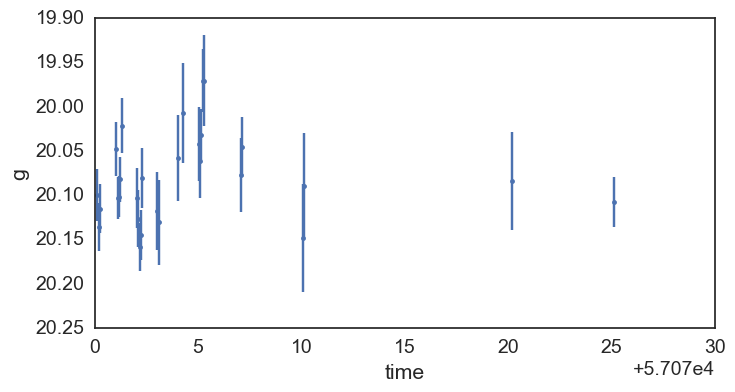

Blind15A_27_N19_0351_0572
Var_prob          0.930742
Per_prob          0.406718
QSO                  0.925
raMedian           150.367
decMedian        -0.209141
X                   351.43
Y                    572.2
Mean               20.5004
Amplitude        0.0735426
Std              0.0458824
MedianAbsDev     0.0321764
Meanvariance    0.00223812
Eta_e              68.8955
main_type              QSO
Name: Blind15A_27_N19_0351_0572, dtype: object


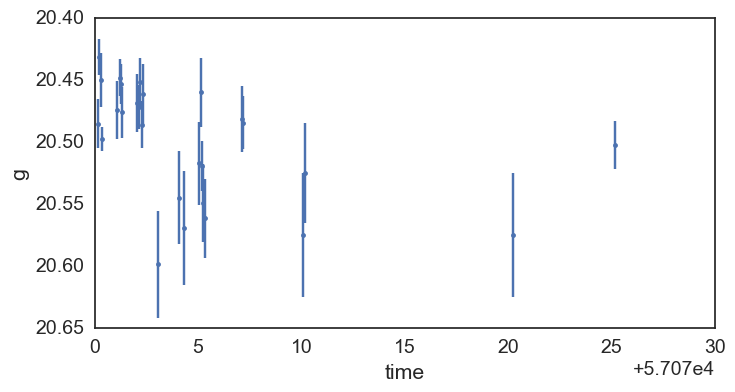

Blind15A_49_N6_0394_1006
Var_prob          0.733101
Per_prob          0.231662
QSO               0.915152
raMedian           158.493
decMedian         -4.22488
X                  394.221
Y                  1006.81
Mean               18.7527
Amplitude        0.0675772
Std               0.042493
MedianAbsDev     0.0260913
Meanvariance    0.00226596
Eta_e              56.7528
main_type           Galaxy
Name: Blind15A_49_N6_0394_1006, dtype: object


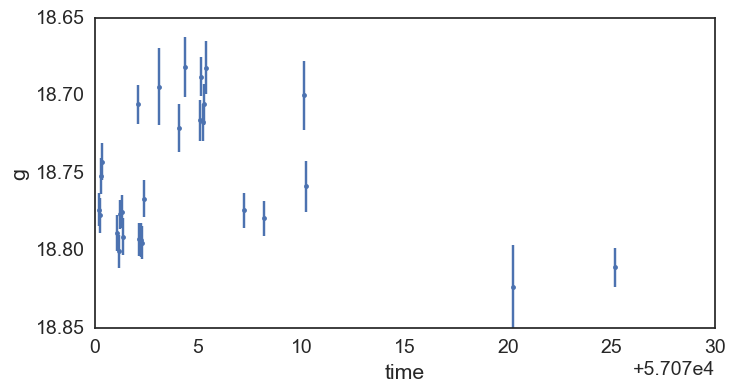

Blind15A_19_N19_1345_1791
Var_prob              0.7
Per_prob         0.370249
QSO                 0.975
raMedian          144.914
decMedian        -4.73146
X                 1345.77
Y                 1791.28
Mean              19.1433
Amplitude       0.0529655
Std             0.0313815
MedianAbsDev    0.0287904
Meanvariance    0.0016393
Eta_e             26.1588
main_type            Blue
Name: Blind15A_19_N19_1345_1791, dtype: object


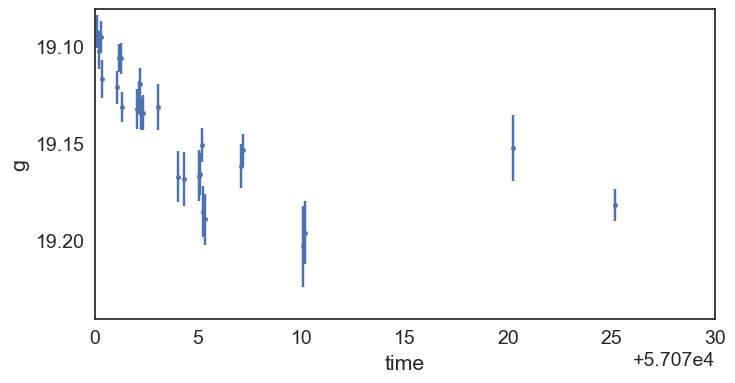

Blind15A_14_S8_0446_1355
Var_prob          0.833333
Per_prob          0.381644
QSO                  0.925
raMedian           141.017
decMedian       -0.0056419
X                  446.004
Y                  1355.37
Mean               18.4027
Amplitude        0.0515302
Std              0.0330505
MedianAbsDev     0.0245737
Meanvariance    0.00179596
Eta_e              14.6234
main_type              QSO
Name: Blind15A_14_S8_0446_1355, dtype: object


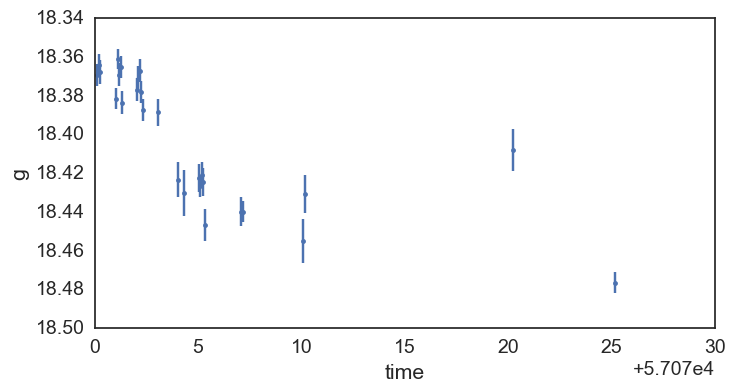

Blind15A_39_N14_1319_1938
Var_prob          0.559438
Per_prob         0.0382983
QSO                   0.95
raMedian           152.305
decMedian         -4.61944
X                  1319.79
Y                  1938.78
Mean               19.5751
Amplitude        0.0475684
Std              0.0277533
MedianAbsDev     0.0180787
Meanvariance    0.00141779
Eta_e              77.7367
main_type             Blue
Name: Blind15A_39_N14_1319_1938, dtype: object


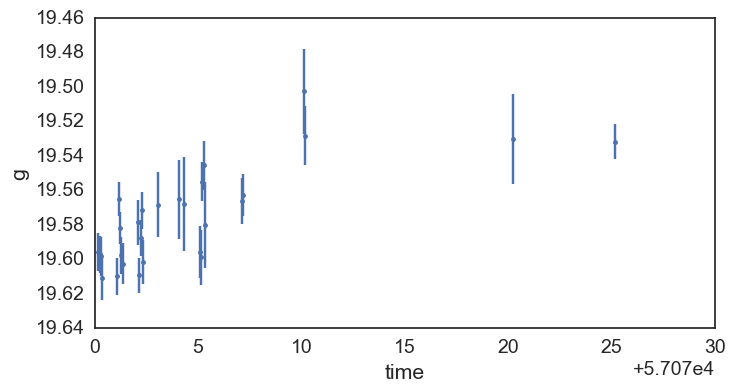

Blind15A_28_N4_0536_1569
Var_prob         0.524936
Per_prob         0.069174
QSO                 0.975
raMedian           150.05
decMedian         -2.1391
X                 536.254
Y                  1569.3
Mean              19.0561
Amplitude       0.0460082
Std             0.0243804
MedianAbsDev    0.0164427
Meanvariance    0.0012794
Eta_e             27.6741
main_type           BLLac
Name: Blind15A_28_N4_0536_1569, dtype: object


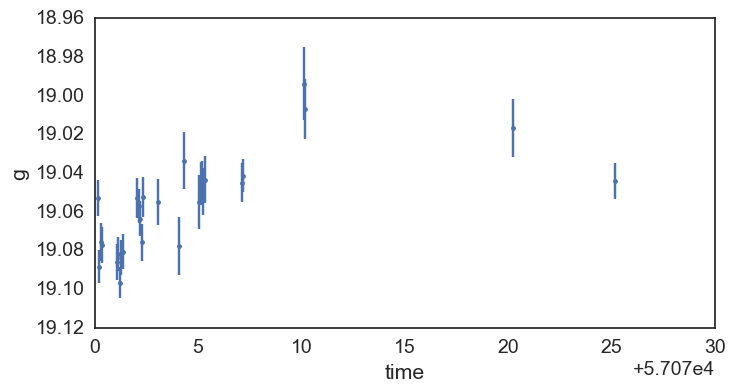

Blind15A_38_S16_0145_0999
Var_prob          0.533333
Per_prob         0.0430725
QSO                  0.925
raMedian            154.09
decMedian         -1.61571
X                  145.899
Y                  999.453
Mean               18.9367
Amplitude        0.0449864
Std              0.0245104
MedianAbsDev     0.0154882
Meanvariance    0.00129433
Eta_e               28.764
main_type              QSO
Name: Blind15A_38_S16_0145_0999, dtype: object


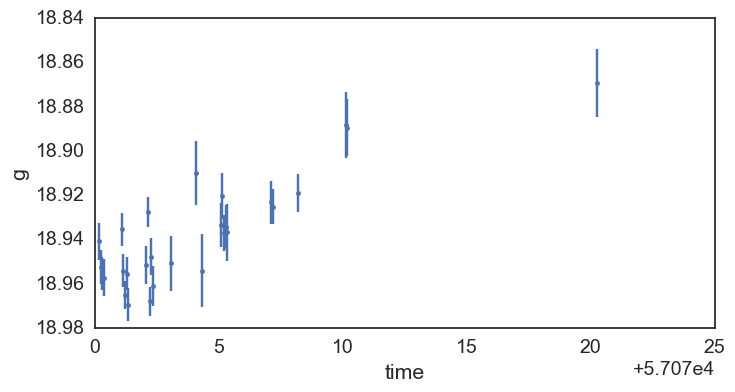

Blind15A_48_N22_1020_2334
Var_prob          0.533333
Per_prob         0.0147538
QSO                  0.975
raMedian           159.187
decMedian         -2.66698
X                  1020.23
Y                  2334.17
Mean                 19.48
Amplitude        0.0436979
Std              0.0234446
MedianAbsDev     0.0156367
Meanvariance    0.00120352
Eta_e              78.6983
main_type              QSO
Name: Blind15A_48_N22_1020_2334, dtype: object


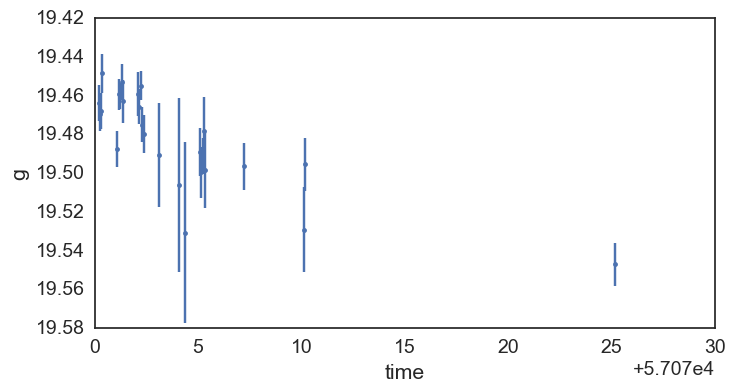

Blind15A_05_S29_1458_0782
Var_prob          0.699068
Per_prob          0.213011
QSO                   0.95
raMedian           137.975
decMedian          2.57622
X                  1458.83
Y                  782.412
Mean                19.243
Amplitude        0.0423712
Std              0.0276876
MedianAbsDev     0.0215825
Meanvariance    0.00143884
Eta_e              82.5215
main_type           Galaxy
Name: Blind15A_05_S29_1458_0782, dtype: object


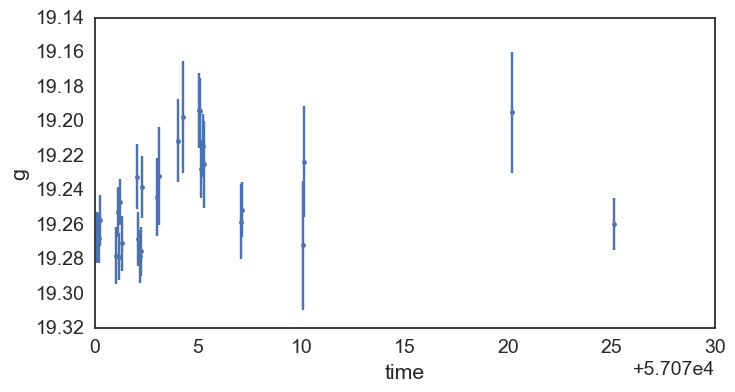

Blind15A_33_N6_1521_2397
Var_prob               0.7
Per_prob          0.409683
QSO                  0.975
raMedian           152.838
decMedian         -2.21098
X                  1521.33
Y                  2397.64
Mean               18.5635
Amplitude        0.0351142
Std              0.0209255
MedianAbsDev     0.0157256
Meanvariance    0.00112724
Eta_e              12.9247
main_type        Seyfert_1
Name: Blind15A_33_N6_1521_2397, dtype: object


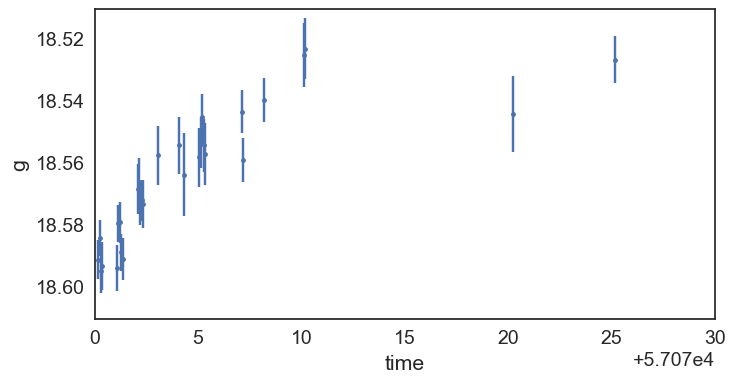

Blind15A_23_N26_1886_1994
Var_prob           0.666667
Per_prob           0.456887
QSO                   0.975
raMedian            147.459
decMedian          -3.09936
X                   1886.22
Y                   1994.27
Mean                17.7474
Amplitude         0.0311302
Std               0.0170946
MedianAbsDev      0.0131373
Meanvariance    0.000963217
Eta_e               60.5526
main_type             Radio
Name: Blind15A_23_N26_1886_1994, dtype: object


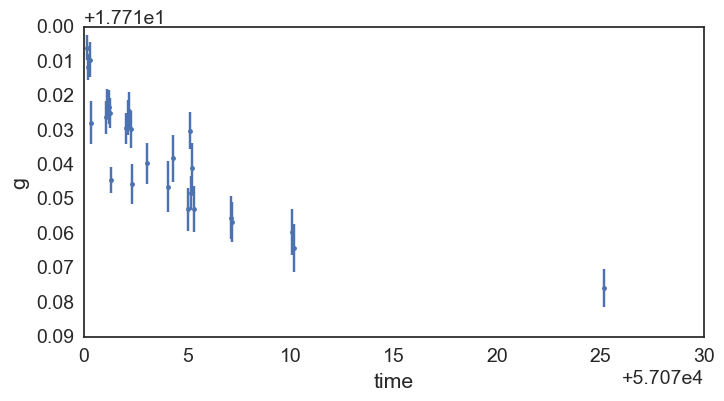

Blind15A_29_S4_1269_1897
Var_prob         0.866667
Per_prob         0.178371
QSO                 0.975
raMedian          148.918
decMedian        -4.02831
X                 1269.36
Y                 1897.41
Mean               18.215
Amplitude       0.0310778
Std             0.0212204
MedianAbsDev    0.0164531
Meanvariance     0.001165
Eta_e             53.3797
main_type          Galaxy
Name: Blind15A_29_S4_1269_1897, dtype: object


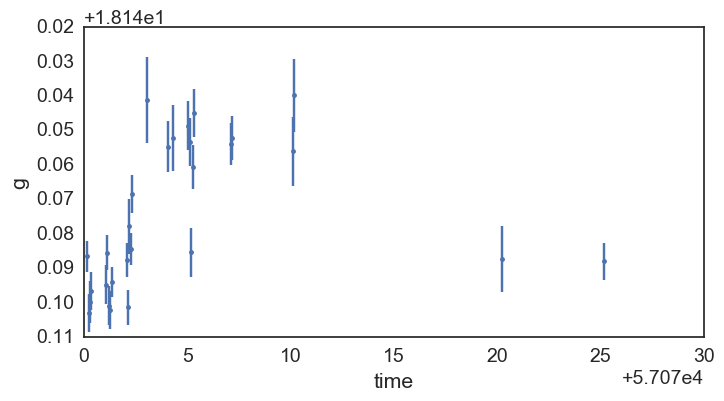

Blind15A_43_N31_0728_0441
Var_prob           0.566667
Per_prob           0.180024
QSO                       1
raMedian            157.046
decMedian          -3.02009
X                   728.559
Y                   441.328
Mean                17.9154
Amplitude         0.0309343
Std               0.0159711
MedianAbsDev     0.00845043
Meanvariance    0.000891474
Eta_e               32.7023
main_type               QSO
Name: Blind15A_43_N31_0728_0441, dtype: object


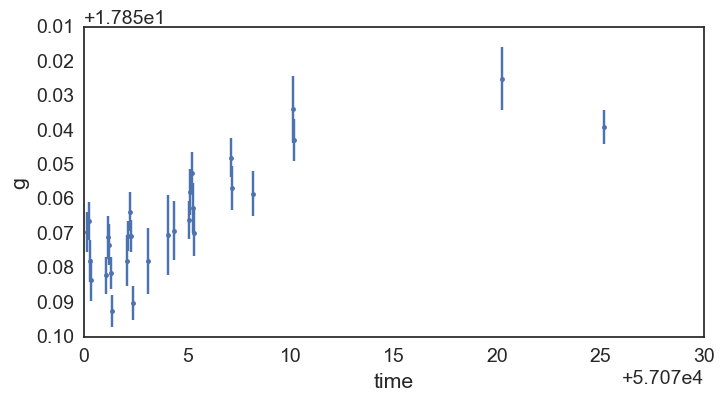

Blind15A_47_S8_0413_1273
Var_prob          0.766667
Per_prob          0.277128
QSO                   0.95
raMedian           159.548
decMedian         0.297326
X                  413.916
Y                   1273.7
Mean               18.6044
Amplitude        0.0306522
Std              0.0210556
MedianAbsDev     0.0112845
Meanvariance    0.00113175
Eta_e              4.12261
main_type           Galaxy
Name: Blind15A_47_S8_0413_1273, dtype: object


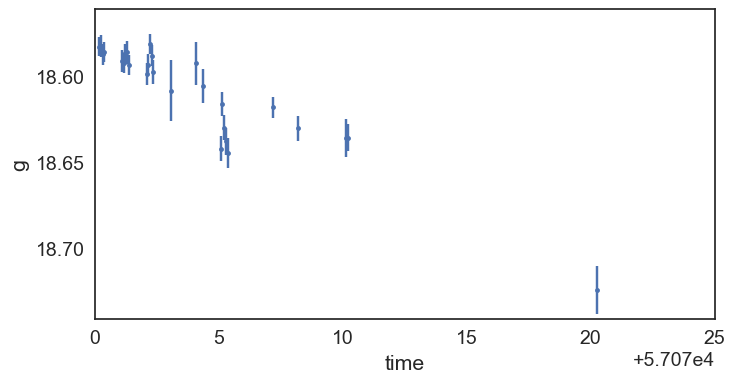

In [10]:
for idx, row in table.sort_values('Amplitude',ascending=False).iterrows():
#if True:

    print '\r',idx
    label = row['Pred_class']
    print row[['Var_prob','Per_prob','QSO','raMedian',
               'decMedian','X','Y','Mean','Amplitude',
               'Std','MedianAbsDev','Meanvariance','Eta_e','main_type']]

    field, CCD, X, Y = re.findall(
            r'(\w+\d+\w?\_\d\d?)\_(\w\d+?)\_(\d+)\_(\d+)', idx)[0]
    #try:
    time, mag, err, time2, mag2, err2 = give_me_lc(field, CCD, X, Y,extract=False)
    #except:
    #    print 'fail during LC read'
    #    continue
    #continue
    
    goods = np.where(mag>=15.)
    time = time[goods]
    mag = mag[goods]
    err = err[goods]
    
    filtered_data = sigma_clip(mag, sigma=3, iters=1,
                           cenfunc=np.mean, copy=False)
    time = time[~filtered_data.mask]
    mag = mag[~filtered_data.mask]
    err = err[~filtered_data.mask]
    #print 'clipped: ', np.sum(filtered_data.mask)
    T = 0.8161883/2
    
    if label in ['RRLYR','EB','DSCT','ZZ','ROTVAR']:
        
        fig = plt.figure(figsize=(15,9))
        gs = gridspec.GridSpec(2,2)
        ax1 = fig.add_subplot(gs[0,0])
        ax2 = fig.add_subplot(gs[0,1])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
            
        # LC 
        ax1.errorbar(time, mag, yerr=err, fmt='b*', label='sig_clip')
        ax1.set_xlabel('time')
        
        if label in ['EB'] :
            T *= 2
            T_W *= 2
            T_G *= 2
        # phase LC from LS
        phase1 = np.mod(time, T) / T
        sort_idx1 = np.argsort(phase1)
        PHASE = np.hstack([phase1[sort_idx1], phase1[sort_idx1]+1.])
        MAG = np.hstack([mag[sort_idx1],mag[sort_idx1]])
        ERR = np.hstack([err[sort_idx1],err[sort_idx1]])
        
        ax2.errorbar(PHASE-1, MAG, yerr=ERR, fmt='g*', label='LS')
        ax2.text(0.1, 0.1,'LS',fontsize=16,ha='left', va='top', transform=ax2.transAxes)
        
        phase_W = np.mod(time, T_W) / T_W
        sort_idx_W = np.argsort(phase_W)
        PHASE_W = np.hstack([phase_W[sort_idx_W], phase_W[sort_idx_W]+1.])
        MAG_W = np.hstack([mag[sort_idx_W],mag[sort_idx_W]])
        ERR_W = np.hstack([err[sort_idx_W],err[sort_idx_W]])
        
        ax3.errorbar(PHASE_W-1, MAG_W, yerr=ERR_W, fmt='b*', alpha=.7)
        ax3.text(0.1, 0.1,'WMCC',fontsize=16,ha='left', va='top', transform=ax3.transAxes)
        ax3.set_xlabel('phase', fontsize=15)
        ax3.set_ylabel('g', fontsize=15)
        
        phase_G = np.mod(time, T_G) / T_G
        sort_idx_G = np.argsort(phase_G)
        PHASE_G = np.hstack([phase_G[sort_idx_G], phase_G[sort_idx_G]+1.])
        MAG_G = np.hstack([mag[sort_idx_G],mag[sort_idx_G]])
        ERR_G = np.hstack([err[sort_idx_G],err[sort_idx_G]])
        
        ax4.errorbar(PHASE_G-1, MAG_G, yerr=ERR_G, fmt='b*', alpha=.7)
        ax4.text(0.1, 0.1,'GLS',fontsize=16,ha='left', va='top', transform=ax4.transAxes)
        ax4.set_xlabel('phase', fontsize=15)
        ax4.set_ylabel('g', fontsize=15) 
            
        ax1.set_ylabel('g', fontsize=15)
        ax1.set_xlabel('MJD', fontsize=15)
        ax2.set_ylabel('g', fontsize=15)
        ax2.set_xlabel('phase', fontsize=15)
        ax1.invert_yaxis()
        ax2.invert_yaxis()
        ax3.invert_yaxis()
        ax4.invert_yaxis()
        plt.show()
        
    else:
        plt.figure(figsize=(8,4))
        plt.errorbar(time, mag, yerr=err, fmt='b.')
        plt.xlabel('time')
        plt.ylabel('g')
        plt.gca().invert_yaxis()
        plt.show()